In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.count().isnull() # there is no null value

Gender    False
Height    False
Weight    False
dtype: bool

In [5]:
df.shape # dataset size

(8555, 3)

<AxesSubplot:xlabel='Gender', ylabel='count'>

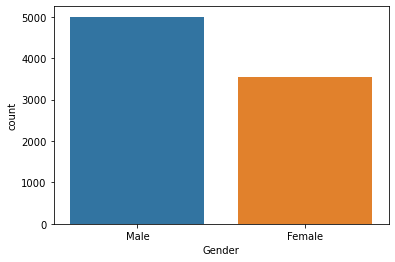

In [6]:
sns.countplot(x='Gender',data=df)

# Define X and Y 

In [7]:
x = df.drop('Weight',axis = 1)

In [8]:
x.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [9]:
y = df[['Weight']]

In [10]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


# Encoding for the non-numeric values

In [11]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
for col in x.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        x[col] = le.fit_transform(x[col]) 

In [14]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


# Split the dataset for Train, Test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.3, random_state=1) # train size = 0.7

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(xtrain,ytrain) # train the model

LinearRegression()

In [20]:
lr.predict(xtest) # predict Y based on X

array([[143.83013436],
       [197.53417989],
       [184.63515112],
       ...,
       [160.7078525 ],
       [186.82852694],
       [201.4226542 ]])

In [21]:
ytest.head() # actual Y

,Weight
7154,160.800726
3258,184.516688
2188,184.262796
5609,166.844114
3186,200.466282


In [22]:
ytest1 = ytest.copy()
ytest1['predicted_Y'] = lr.predict(xtest)

In [23]:
ytest1.head() # actual Y along with predicted Y

,Weight,predicted_Y
7154,160.800726,143.830134
3258,184.516688,197.534180
2188,184.262796,184.635151
5609,166.844114,149.318948
3186,200.466282,197.992697


# Evalueate the model (Linear Regression)

In [24]:
lr.score(xtest, ytest) # model accuracy / testing accuracy

0.9059959607091161

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
#calculating Mean Squared Error
mse = mean_squared_error(ytest,lr.predict(xtest))
mse

99.67250998070031

In [27]:
#calculating Mean Absolute Error
mae = mean_absolute_error(ytest, lr.predict(xtest))
mae

7.982132592729128

# KNN Regressor

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
knnr = KNeighborsRegressor()

In [30]:
knnr.fit(xtrain, ytrain)

KNeighborsRegressor()

In [31]:
knnr.predict(xtest)

array([[150.1761117 ],
       [197.46276978],
       [179.03501546],
       ...,
       [160.26227546],
       [180.65461322],
       [200.56451578]])

In [32]:
ytest.head()

,Weight
7154,160.800726
3258,184.516688
2188,184.262796
5609,166.844114
3186,200.466282


In [33]:
ytest2 = ytest.copy()

In [34]:
ytest2['Predicted_y'] = knnr.predict(xtest)

In [35]:
ytest2.head()

,Weight,Predicted_y
7154,160.800726,150.176112
3258,184.516688,197.462770
2188,184.262796,179.035015
5609,166.844114,148.316105
3186,200.466282,200.284997


# Evaluate the model (KNN Regressor)

In [36]:
knnr.score(xtest, ytest) # testing accuracy

0.8838502073708883

In [37]:
#calculating Mean Squared Error
mse_knnr = mean_squared_error(ytest,knnr.predict(xtest))
mse_knnr

123.15365863436983

In [38]:
#calculating Mean Absolute Error
mae_knnr = mean_absolute_error(ytest, knnr.predict(xtest))
mae_knnr

8.850747809837165

# KNN Classifier

In [39]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Define X and Y

In [40]:
m = df.drop('Gender',axis=1)

In [41]:
n = df[['Gender']]

In [42]:
m.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [43]:
n.head()

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male


# Split the dataset for Train, Test

In [44]:
mtrain, mtest, ntrain, ntest = train_test_split(m, n, test_size=0.30, random_state=2)

Apply the KNN classifier Algorithm

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knnc = KNeighborsClassifier() # default k =5 and weights = 'uniform'

In [47]:
knnc.fit(mtrain, ntrain) #train the model

KNeighborsClassifier()

In [48]:
knnc.predict(mtest) # predict N

array(['Female', 'Female', 'Male', ..., 'Male', 'Female', 'Male'],
      dtype=object)

In [49]:
ntest2 = ntest.copy()

In [50]:
ntest2['Predicted_Gender'] = knnc.predict(mtest)


In [51]:
ntest2.head() # predicted N along with actual N

,Gender,Predicted_Gender
4834,Male,Female
3202,Male,Female
4872,Male,Male
8455,Female,Female
3069,Male,Male


In [52]:
ntest.head()

,Gender
4834,Male
3202,Male
4872,Male
8455,Female
3069,Male


# Evaluate the model (KNN Classifier)

In [53]:
knnc.score(mtest, ntest) # accuracy

0.9092325671990651

In [54]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_curve, plot_roc_curve

In [55]:
pred = knnc.predict(mtest)

In [56]:
print(classification_report(ntest,pred)) # classification Report

              precision    recall  f1-score   support

      Female       0.89      0.90      0.89      1058
        Male       0.93      0.92      0.92      1509

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [57]:
cm = confusion_matrix(ntest, pred) # confussion Matrix
cm 

array([[ 947,  111],
       [ 122, 1387]], dtype=int64)

<AxesSubplot:>

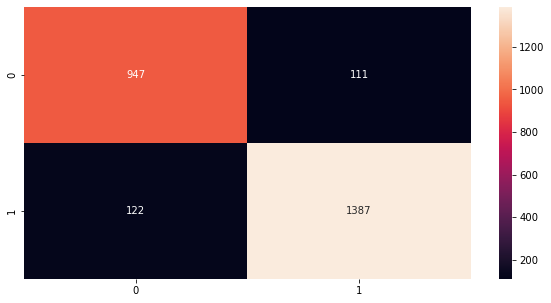

In [58]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d")

# ROC curve

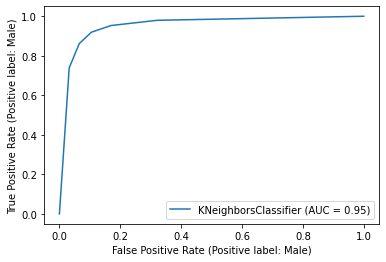

In [59]:
plot_roc_curve(knnc, mtest, ntest)

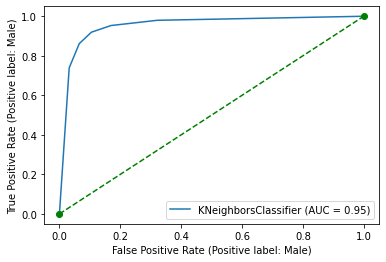

In [60]:
plot_roc_curve(knnc, mtest, ntest)
plt.plot([0,1],[0,1], 'go--')